<a href="https://colab.research.google.com/github/muradek/ML_Major_HW1/blob/main/major_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#HW1 - Data Exploration and Preparation

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Part 1: Data Loadin and First Look

## Loading the dataset

In [2]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

rm: cannot remove '*.csv': No such file or directory
Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [3]:
dataset = pd.read_csv(filename)

In [10]:
# Q1 getting the datas #rows and #cols
dataset.shape

(1250, 25)

In [26]:
# Q2 inspecting conversations_per_day field
dataset.conversations_per_day.value_counts()

conversations_per_day
3     218
2     204
5     179
4     168
1     108
6     107
7      94
8      54
9      42
10     29
11     16
13      8
12      7
14      6
16      5
15      3
17      1
29      1
Name: count, dtype: int64

In [55]:
# Q3 inspecting the features of the data
print(dataset.columns)
print(dataset.PCR_10.value_counts())
dataset.head()

Index(['patient_id', 'age', 'sex', 'weight', 'blood_type', 'current_location',
       'num_of_siblings', 'happiness_score', 'household_income',
       'conversations_per_day', 'sugar_levels', 'sport_activity', 'pcr_date',
       'PCR_01', 'PCR_02', 'PCR_03', 'PCR_04', 'PCR_05', 'PCR_06', 'PCR_07',
       'PCR_08', 'PCR_09', 'PCR_10', 'spread', 'risk'],
      dtype='object')
PCR_10
-126.780598    1
-154.771775    1
 17.042635     1
-183.836107    1
-71.704747     1
              ..
-112.111519    1
 183.994231    1
 170.907313    1
-118.483405    1
-53.083826     1
Name: count, Length: 1250, dtype: int64


,patient_id,age,sex,weight,blood_type,current_location,num_of_siblings,happiness_score,household_income,conversations_per_day,...,PCR_03,PCR_04,PCR_05,PCR_06,PCR_07,PCR_08,PCR_09,PCR_10,spread,risk
0,733,31,F,80.8,O-,"('11.93381', '79.82979')",6,6,0.7,5,...,-154.375498,176.847024,4.385181,10.213329,0.927466,22.333871,2.392578,-126.780598,1.0,1
1,382,29,F,63.0,O+,"('51.67822', '33.9162')",1,9,NaN,11,...,-200.700948,-7.135415,7.128887,30.027329,-0.084755,1.700489,2.735347,-175.576828,-1.0,-1
2,1164,44,F,74.2,O+,"('60.02427', '30.28491')",2,10,1.5,3,...,127.222441,59.712513,1.227654,16.907687,1.609130,7.258721,4.937827,-233.105192,-1.0,-1
3,897,9,M,31.8,O-,"('51.08468', '7.11393')",3,9,0.5,8,...,116.178667,72.100204,6.181840,17.018475,2.313162,1.707770,1.686465,-28.548362,-1.0,-1
4,1187,18,F,42.4,A-,"('38.45598', '48.87498')",0,8,0.2,4,...,71.377753,187.436001,4.709932,13.888960,5.401181,4.500906,3.767817,-27.173870,-1.0,-1


In [34]:
# Q4 partitioning the data to train and test sets
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=8)

## Part 2: Missing Values

In [59]:
# Q5 looking for null values in the data
print("training set null values: \n", pd.isnull(train_set).sum(),"\n")
print("test set null values: \n",pd.isnull(test_set).sum(), "\n")

training set null values: 
 patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household_income         86
conversations_per_day     0
sugar_levels              0
sport_activity            0
pcr_date                  0
PCR_01                    0
PCR_02                    0
PCR_03                    0
PCR_04                    0
PCR_05                    0
PCR_06                    0
PCR_07                    0
PCR_08                    0
PCR_09                    0
PCR_10                    0
spread                    0
risk                      0
dtype: int64 

test set null values: 
 patient_id                0
age                       0
sex                       0
weight                    0
blood_type                0
current_location          0
num_of_siblings           0
happiness_score           0
household

Text(0.5, 1.0, 'Histogram of household income')

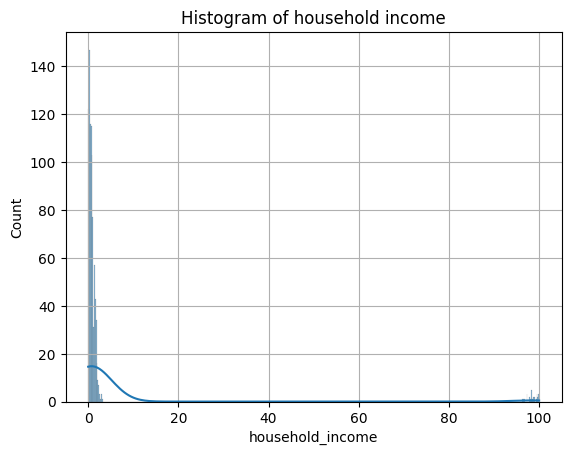

In [49]:
# Q6 checking the distribution of income values
sns.histplot(train_set.household_income, kde=True)
plt.grid()
plt.title(r'Histogram of household income')

In [52]:
# Q7 inspecting household_income statistics for replacing null values
print("mean is: ", train_set.household_income.mean())
print("median is: ", train_set.household_income.median())

mean is:  3.8589715536105036
median is:  0.7


In [53]:
# Q7 - Task A - filling null values with median values
filled_train_set = train_set.fillna({"household_income":train_set.household_income.median()})
filled_test_set = test_set.fillna({"household_income":test_set.household_income.median()})
print("mean is: ", filled_train_set.household_income.mean())
print("median is: ", filled_train_set.household_income.median())

mean is:  3.5873000000000004
median is:  0.7


# How to download from Colab?

In [ ]:
from google.colab import files
outputPath = "saved_file.csv"
dataset.to_csv(outputPath)
files.download(outputPath)